# 1. Import Dependencies

In [2]:
# Import opencv for computer vision stuff
import cv2
# Import matplotlib so we can visualize an image
from matplotlib import pyplot as plt

# 2. Connecting to Your Webcam

In [10]:
# Connect to capture device
cap = cv2.VideoCapture(0)

In [11]:
# Get a frame from the capture device
ret, frame = cap.read()

In [12]:
print(ret)

True


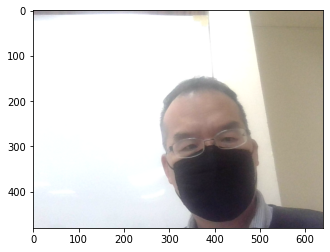

In [13]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

In [14]:
# Releases capture back into the wild 
cap.release()

In [15]:
def take_photo(): 
    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()
    cv2.imwrite('data/webcamphoto.jpg', frame)
    cap.release()

In [16]:
take_photo()

# 3. Rendering in Real Time

In [2]:
# Connect to webcam
cap = cv2.VideoCapture(0)
# Loop through every frame until we close our webcam
while cap.isOpened(): 
    ret, frame = cap.read()
    
    # Show image 
    cv2.imshow('Webcam', frame)
    
    # Checks whether q has been hit and stops the loop
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break

# Releases the webcam
cap.release()
# Closes the frame
cv2.destroyAllWindows()

https://docs.opencv.org/3.4/d8/dfe/classcv_1_1VideoCapture.html

https://stackoverflow.com/questions/57716962/difference-between-video-capture-read-and-grab

同步多頭攝影機 cv2.VideoCapture.read() 不適用!! 使用 cv2.VideoCapture.grab() 和 cv2.VideoCapture.retrieve()!!

grab() "only" gets the image from the camera and holds it for further processing:

The methods/functions grab the next frame from video file or camera and return true (non-zero) in the case of success. [...] you call VideoCapture::grab() for each camera and after that call the slower method VideoCapture::retrieve() to decode and get frame from each camera.

In this case, you still have to retrieve the frame (i.e. "decode and get") from OpenCV so that you can work with it. grab only returns a boolean that indicates whether OpenCV was able to get the frame from the camera - the return parameter in this case is not the frame.

read() combines both grab() and retrieve() operations into one command and returns the already decoded frame:

The methods/functions combine VideoCapture::grab() and VideoCapture::retrieve() in one call. This is the most convenient method for reading video files or capturing data from decode and return the just grabbed frame. If no frames has been grabbed (camera has been disconnected, or there are no more frames in video file), the methods return false and the functions return NULL pointer.

This method returns the actual frame back to your application so you don't have to worry about checking the boolean parameter and writing an additional line of code to get the frame back by OpenCV.